In [282]:
import os
import json

import pandas as pd


def read_latest_pages() -> dict:
    files = os.listdir("data")
    files = [f for f in files if f.endswith(".json")]
    filenname = max(files)
    path = os.path.join("data", filenname)
    
    dic = json.load(open(path))
    return dic


def clean_last_change(df: pd.DataFrame):
    lcs = []
    for i in range(len(df)):
        lc = df.iloc[i]["last_change"].strip().lower()
        lc = lc.split(" ")[2:4]
        lc[0] = lc[0].replace(",", "")
        lc = " ".join(lc)
        lc = pd.to_datetime(lc)
        lcs.append(lc)
    df["last_change"] = lc


def clean_price(df: pd.DataFrame):
    prices = []
    for i in range(len(df)):
        price = df.iloc[i]["price_info"]["Kaufpreis"]
        price = price.replace("€", "").replace(".", "").replace(",", ".").strip()
        price = float(price)
        prices.append(price)
    df["price"] = prices

    has_broker_commission = []
    for i in range(len(df)):
        bc = df.iloc[i]["price_info"]
        bc_keys = [k.strip().lower() for k in bc.keys()]
        has_bc = any(["provision" in k for k in bc_keys])
        has_broker_commission.append(has_bc)
    df["broker"] = has_broker_commission

    df.drop(columns=["price_info"], inplace=True)


def clean_address(df: pd.DataFrame):
    districts = []
    for i in range(len(df)):
        address = df.iloc[i]["address"].strip()
        address = address.split(",")
        address = [a.strip() for a in address]
        address = [a for a in address if a[0].isdigit() and len(a.split(" ")[0]) == 4]
        address = None if len(address) == 0 else address[0].split(" ")[0]
        districts.append(address)
    
    df["district"] = districts
    df.drop(columns=["address"], inplace=True)


def clean_attributes(df: pd.DataFrame):
    neubau = []
    areas = []
    num_rooms = []
    needs_renovation = []

    for i in range(len(df)):
        attrs = df.iloc[i]["attributes"]
        lower_attrs = {}
        for k, v in attrs.items():
            lower_attrs[k.strip().lower()] = v.strip().lower() # type: ignore
        attrs = lower_attrs

        # neubau
        constr_type = attrs.get("bautyp", None)
        if constr_type == "neubau":
            neubau.append(True)
        elif constr_type == "altbau":
            neubau.append(False)
        else:
            neubau.append(None)

        # area
        area = attrs.get("wohnfläche", None)
        if area:
            area = area.split(" ")[0].replace(",", ".").strip()
            try:
                area = float(area)
            except:
                area = None
        areas.append(area)

        # num rooms
        nr = attrs.get("zimmer", None)
        if nr:
            try:
                nr = int(nr)
            except:
                nr = None
        num_rooms.append(nr)

        # needs renovation
        needs_ren = attrs.get("zustand", None)
        if needs_ren == "sanierungsbedürftig":
            needs_ren = True
        elif needs_ren != None:
            needs_ren = False
        else:
            needs_ren = None

        needs_renovation.append(needs_ren)

    df["neubau"] = neubau
    df["area"] = areas
    df["rooms"] = num_rooms
    df["needs_fix"] = needs_renovation

    df.drop(columns=["attributes"], inplace=True)


dic = read_latest_pages()
df = pd.DataFrame(dic).T

df["title"] = df["title"].apply(lambda x: x.strip().lower())
df["descriptions"] = df["descriptions"].apply(lambda x: x["description_general"].strip().lower())

clean_last_change(df)
clean_price(df)
clean_address(df)
clean_attributes(df)

df.drop(columns=["energy_certificate"], inplace=True)

df


/var/folders/bh/4ympj4l52bs8wxpg114kdh1m0000gn/T/ipykernel_17604/3324483975.py:24: UserWarning: Parsing dates in %d.%m.%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  lc = pd.to_datetime(lc)


,url,title,last_change,descriptions,price,broker,district,neubau,area,rooms,needs_fix
0,https://www.willhaben.at/iad/immobilien/d/eige...,kompakter 1-zimmer wohnhit in liesing,2024-03-26 20:35:00,zum verkauf steht eine kompakte wohnung mit ei...,129000.00,True,1230,False,31.01,1.0,False
1,https://www.willhaben.at/iad/immobilien/d/eige...,++++preissturz - gelegenheit mit wohnbauförder...,2024-03-26 20:35:00,erst vor wenigen tagen wurden die renovierungs...,145000.00,True,3465,True,81.40,3.0,None
2,https://www.willhaben.at/iad/immobilien/d/eige...,ruhig gelegene starter-/singlewohnung im 1. li...,2024-03-26 20:35:00,grundbuch statt sparbuch!die perfekte wohnlösu...,127000.00,True,1100,False,29.00,1.0,None
3,https://www.willhaben.at/iad/immobilien/d/eige...,#sq - unbefristet vermietet altbauwohnung in t...,2024-03-26 20:35:00,zum verkauf gelangt eine in toplage befindlich...,135000.00,True,1150,False,50.22,2.0,None
4,https://www.willhaben.at/iad/immobilien/d/eige...,"jetzt investieren und profitieren: 1,5-zimmer-...",2024-03-26 20:35:00,"tolle single-, studentenwohnung- wohnen im her...",119005.00,True,1100,False,31.57,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...
435,https://www.willhaben.at/iad/immobilien/d/eige...,2 zimmer eigentumswohnung in top-lage 1220 wi...,2024-03-26 20:35:00,!!! anlegerhit !!!1220 wien - stadlauwohnfläch...,149000.00,True,1220,False,46.92,2.0,True
436,https://www.willhaben.at/iad/immobilien/d/eige...,wohnglück auf 30 m² | klein - fein - und alles...,2024-03-26 20:35:00,b>single-wohnung mit altbauflair sie suchen ei...,135000.00,True,1140,False,30.70,1.0,False
437,https://www.willhaben.at/iad/immobilien/d/eige...,klein aber fein - meine garçonnière in toplage,2024-03-26 20:35:00,wer eine kleine wohnung in heiß begehrter lage...,135000.00,True,1090,False,31.00,1.0,None
438,https://www.willhaben.at/iad/immobilien/d/eige...,top-preis,2024-03-26 20:35:00,top-preis die helle ca. 46 m² große altbauwoh...,136000.00,True,1100,None,46.50,NaN,True


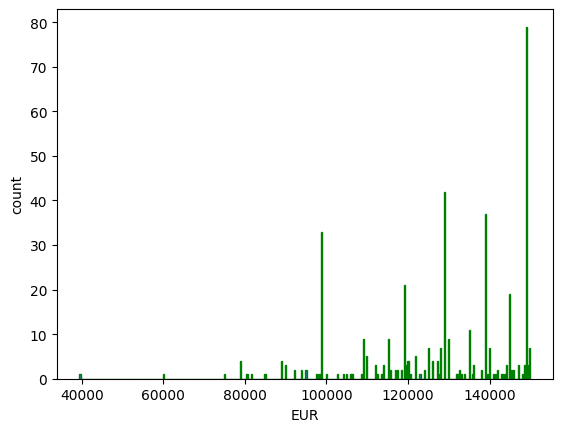

In [285]:
# price distribution

import matplotlib.pyplot as plt

max_price = 150_000
df = df[df["price"] < max_price]

plt.hist(df["price"], bins=len(df), edgecolor="green")
plt.xlabel("EUR")
plt.ylabel("count")
plt.show()